# The Traveling Salesman Problem (TSP)
_A Heuristic Search Primer_

## A Classic Problem
The TSP is one of the oldest and most studied of all heuristic search problems, the subject of _many thousands_ of published academic papers going back to at least the 1930s. It is very easy to state: given i) a list of cities and ii) the road distances between them, find the shortest (minimum distance) "tour" that visits each city exactly once. However, it is very difficult to solve to optimality, even for relatively modest instances. 

Here we will consider the ultimate summer road trip: starting (and ending) in Boston, visit each major league or AAA baseball park in the US. The trip is likely to be at least 10,000 miles (about two round trips between Boston and Los Angeles) but can be much, much longer if we are not careful. 

Let's see what that looks like. (Note: The snippet of code below is in Python, but we can do this in just about any language. For explanatory clarity and performance reasons, most of the code is hidden away in the `tsp.py` file in this folder. Take a peek if you dare!)

In [5]:
# import the baseball data and display the cities as a Pandas DataFrame. 
from tsp import *
cities_df[['City','Teams']]


,City,Teams
0,"Buffalo, NY",Buffalo Bisons (AAA)
1,"Charlotte, NC",Charlotte Knights (AAA)
2,"Columbus, OH",Columbus Clippers (AAA)
3,"Durham, NC",Durham Bulls (AAA)
4,"Indianapolis, IN",Indianapolis Indians (AAA)
5,"Allentown, PA",Lehigh Valley IronPigs (AAA)
6,"Louisville, KY",Louisville Bats (AAA)
7,"Norfolk, VA",Norfolk Tides (AAA)
8,"Pawtucket, RI",Pawtucket Red Sox (AAA)
9,"Rochester, NY",Rochester Red Wings (AAA)


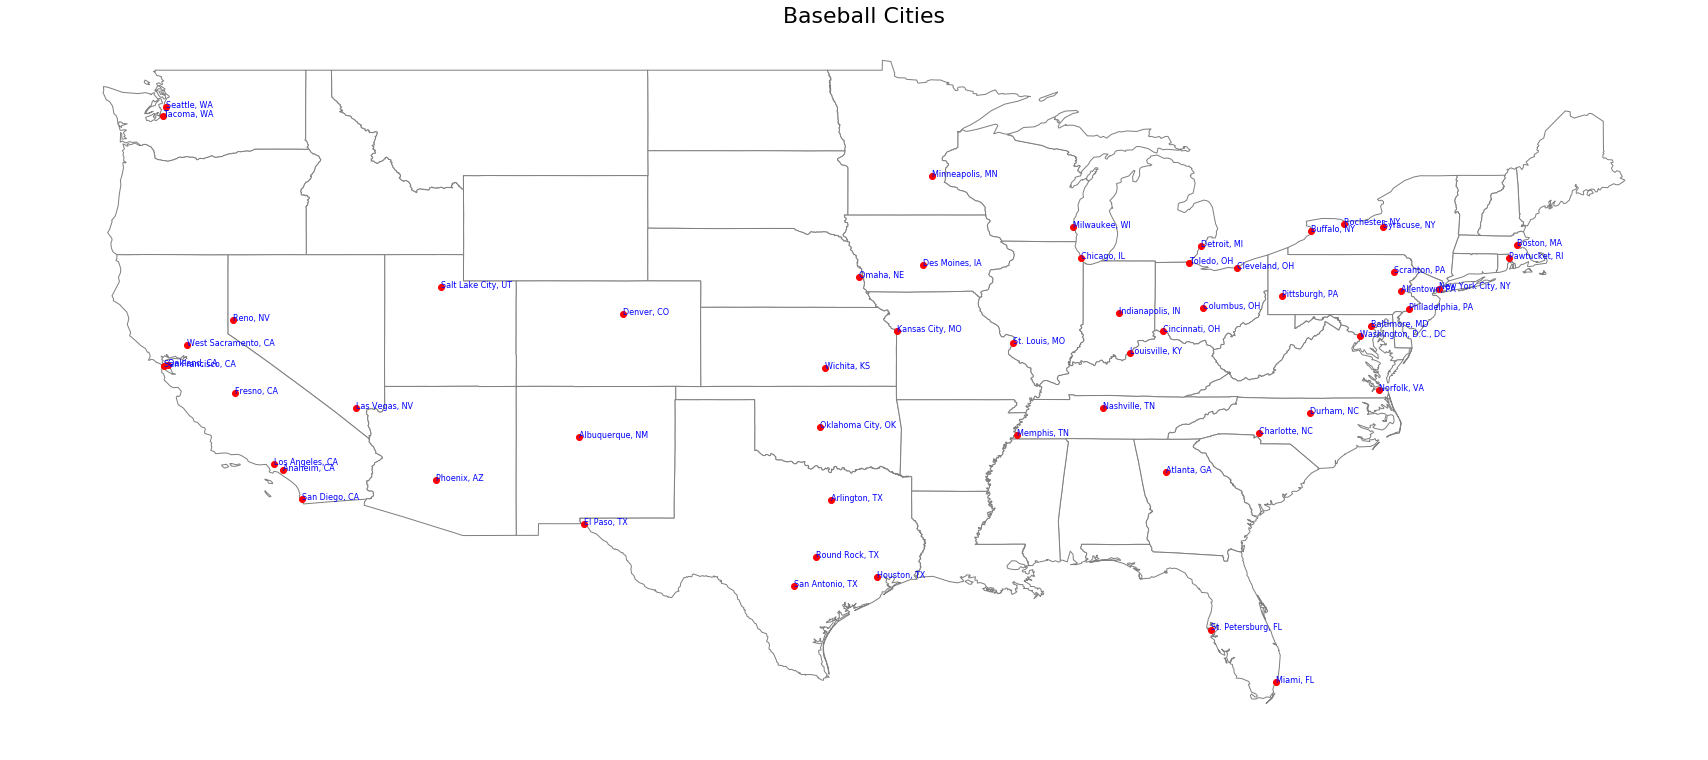

In [2]:
show_map()

## Formulation

### As a Graph Search Problem
In its oldest formulation, the TSP is modeled as a search for the shortest **Hamiltionian cycle** in a **labelled, complete graph**. Let's take that one part at a time. 

A **graph** has nothing to do with the plots you learned about in science or algebra class. Instead, a graph is a visual representation of data as **vertices** and **edges**. 

<p><a href="https://commons.wikimedia.org/wiki/File:6n-graf.svg#/media/File:6n-graf.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/6n-graf.svg/1200px-6n-graf.svg.png" alt="6n-graf.svg" style="width: 200px"></a><br>(By <a href="//commons.wikimedia.org/wiki/User:AzaToth" title="User:AzaToth">User:AzaToth</a> - <a href="//commons.wikimedia.org/wiki/File:6n-graf.png" title="File:6n-graf.png">Image:6n-graf.png</a> simlar input data, Public Domain, <a href="https://commons.wikimedia.org/w/index.php?curid=820489">Link</a>)</p>

The vertices (or "nodes") represent locations in space, with the edges ("arcs") connecting them. So, for example, we can treat just about any road map as a graph, with a node for each map coordinate (cities) and arcs representing the roads themselves (highways). If needed **we can label nodes and arcs** with information like road distances or place names. Arcs can also be **directed**, with arrowheads indicating the direction of traversal. This is, in fact, exactly how Geographic Information Systems store data!

Of course, graphs can represent lots of things besides maps. For example, the decision trees used in classification and search are just acyclic (non-looping) directed graphs, with each split represented by a node. Similarly, an airline schedule (with airports, flights, and *times*) is a kind of "time-space network" graph. The planes, crew, passengers, and cargo **flow** through the graph from takeoff to landing to takeoff to ...

A **complete** graph each node is connected to each other node via an arc. In a directed graph with N nodes, that's N(N-1) arcs if they are directional or N(N-1)/2 if not directional. 
<p><a href="https://commons.wikimedia.org/wiki/File:Complete_graph_K7.svg#/media/File:Complete_graph_K7.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9e/Complete_graph_K7.svg/1200px-Complete_graph_K7.svg.png" alt="Complete graph K7.svg" style="width: 200px"></a><br>(By <a href="//commons.wikimedia.org/wiki/User:Dbenbenn" title="User:Dbenbenn">David Benbennick</a> - <span class="int-own-work" lang="en">Own work</span>, Public Domain, <a href="https://commons.wikimedia.org/w/index.php?curid=511711">Link</a><)/p>

A **Hamiltonian** cycle is a closed loop of arcs, connected end-to-end, that pass through every node. 
<p><a href="https://commons.wikimedia.org/wiki/File:GLPK_solution_of_a_travelling_salesman_problem.svg#/media/File:GLPK_solution_of_a_travelling_salesman_problem.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/GLPK_solution_of_a_travelling_salesman_problem.svg/1200px-GLPK_solution_of_a_travelling_salesman_problem.svg.png" alt="GLPK solution of a travelling salesman problem.svg" style="width: 200px"></a><br>(By <a href="//commons.wikimedia.org/wiki/User:Xypron" title="User:Xypron">Xypron</a> - <span class="int-own-work" lang="en">Own work</span>, Public Domain, <a href="https://commons.wikimedia.org/w/index.php?curid=10645665">Link</a>)</p>

**In the TSP,***
* the nodes are the cities themselves
* the arcs represent the distance from each city to every other city
* the objective is to find the shortest distance Hamiltonian cycle through the graph
    
Note: the graph does not have to cities on a map with a Euclidean distance metric. Any complete graph with distance labels on the arcs will do.  
    
Some of the earliest approaches to the TSP are based on visual inspection of the network graph. These techniques looked for certain properties like **adjacency** or **convex hull shape** or node **degree** to guide the construction of the tour from likely parts and pieces. Christophides's heuristic, for example, used a minimal spanning tree to identify collections of nodes that are "close" to one another and likely to be near-adjacent on the optimal tour. A similar, by simpler approach is taken by the nearest neighbor algorithm covered later in this primer.  

### As an Integer Program
We can model the problem as a kind of assignment problem, where each city is assigned a position (1-st, 2-nd, etc.) in the final tour. Each potential solution is then a **permutation** of the nodes, which is explained with a simpler formulation in the enxt section. 

If we take a cue from the graph theoretic formulations and focus on the arcs instead of the nodes, we can model the problem as a selection of arcs (in any order) from the complete graph. We can even model it as a Linear Program (LP):
<p><img src="img/Dantzig-Fulkerson-Johnson_TSP.png" alt="LP formulation" style="width: 800px"></a></p>
The above formulation (from Dantzig, Fulkerson, and Johnson) is trickier than it looks. The number of loop constraints (at the bottom) explodes as we add nodes and arcs. The problem quickly becomes intractible to solve. 


### As a List Permutation Search Problem
In computer science the most common formulation is as permutation search: find a list of cities, in the order they are to be visited, with the smallest total path distance. 

<p><img src="img/PermutationFormulation.png" alt="Permutation formulation" style="width: 600px"></a></p>

This is the most compact definition! All one has to do is shuffle (permute) the cities on the list, looking for the permutation with the shortest loop path length. 

### A Note About Computational Complexity
The TSP, while compact, is very difficult. Except for the tiniest toy problems it is impossible to try all N! possible permutations. Further, it is unlikely that anyone will ever find a way to ensure an optimal solution without trying every possible solution. 

The TSP is an NP-hard optimization problem. A problem is said to be NP (nondeterministic polynomial) if it is *possible* to reconstruct a known optimal solution in less than exponential time but there is no way to do so for unknown solutions. Confusing, right? Just know that if a problem is NP-complete or NP-hard that it is almost certainly going to take an exponentially increasing amount of time to solve for linearly increasing problem sizes. In the case of the 

## Operators

### Pairwise Swap

### 2-Opt Swap

## Algorithms

### Nearest Neighbor (Greedy Construction)

Nearest neighbor search is pretty much what it sounds like. Starting with a city (Boston, in our case), construct the tour one city at a time, each time adding the closest unvisited city. 
1. Make a list of `UNVISITED` cities, initalized with all cities. 
2. Pick a starting city (in our case, Boston). Add it to the `TOUR` list and remove it from `UNVISITED` list. The city most recently added to the `TOUR` is the  marked as the `HEAD`.
3. Find `UNVISITED` city that is closest to the `HEAD`. Remove it from `UNVISITED`, add it to the `TOUR`, and update the `HEAD`.
4. Repeat step 3 until the `UNVISITED` list is empty. 

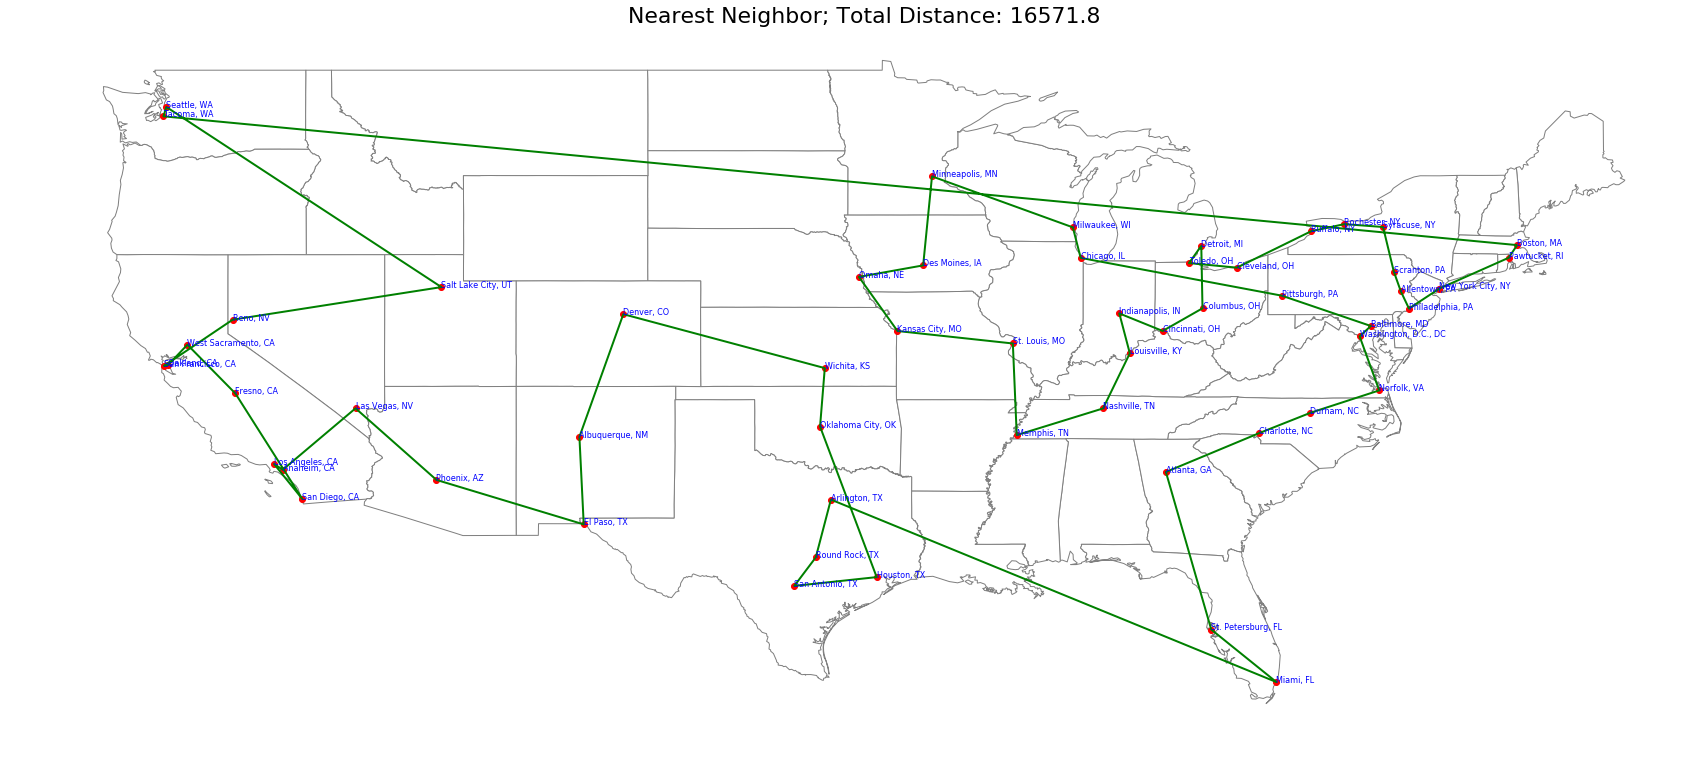

In [3]:
tour = nearest_neighbor(head_idx=30)
show_map(tour, "Nearest Neighbor")

### A* / Branch & Bound (Constructive Tree Search)

### Greedy 2-Opt (Iterative Steepest Descent)

### Simulated Annealing (Iterative Pseudo-Random Descent)